Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Uploading

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving sports.csv to sports (2).csv


In [ ]:
df = pd.read_csv('sports.csv')
df.head()

,Timestamp,What is your favorite sport to watch or follow?,How often do you participate in sports or physical activities?,Which platform do you primarily use to stay updated on sports news and events?,Which sports event or tournament do you look forward to the most?,What motivates you to engage in sports or physical activities?
0,2025/03/06 11:22:40 PM GMT+2,MMA,3-5 times a week,bein sports,UFC,better shape/health;competition;stress relief;...
1,2025/03/06 11:30:21 PM GMT+2,Table tennis,twice,YT,Olympics,better shape/health;competition;entertainment
2,2025/03/06 11:30:40 PM GMT+2,Boxing,3-5 times a week,Social Media,Olympics,better shape/health
3,2025/03/06 11:30:52 PM GMT+2,Basketball,twice,TV,UFC,competition
4,2025/03/06 11:31:03 PM GMT+2,MMA,once a week,bein sports,NBA,stress relief


**Modifying**


In [ ]:
df = df.drop('Timestamp', axis=1)
df.head()

,What is your favorite sport to watch or follow?,How often do you participate in sports or physical activities?,Which platform do you primarily use to stay updated on sports news and events?,Which sports event or tournament do you look forward to the most?,What motivates you to engage in sports or physical activities?
0,MMA,3-5 times a week,bein sports,UFC,better shape/health;competition;stress relief;...
1,Table tennis,twice,YT,Olympics,better shape/health;competition;entertainment
2,Boxing,3-5 times a week,Social Media,Olympics,better shape/health
3,Basketball,twice,TV,UFC,competition
4,MMA,once a week,bein sports,NBA,stress relief


In [ ]:
df = df.rename(columns={
    'What is your favorite sport to watch or follow?': 'Favorite Sport',
    'How often do you participate in sports or physical activities?': 'Activity Frequency',
    'Which platform do you primarily use to stay updated on sports news and events?': 'News Platform',
    'Which sports event or tournament do you look forward to the most?': 'Favorite Event',
    'What motivates you to engage in sports or physical activities?': 'Motivation'
})
df.head()


,Favorite Sport,Activity Frequency,News Platform,Favorite Event,Motivation
0,MMA,3-5 times a week,bein sports,UFC,better shape/health;competition;stress relief;...
1,Table tennis,twice,YT,Olympics,better shape/health;competition;entertainment
2,Boxing,3-5 times a week,Social Media,Olympics,better shape/health
3,Basketball,twice,TV,UFC,competition
4,MMA,once a week,bein sports,NBA,stress relief


In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Favorite Sport      50 non-null     object
 1   Activity Frequency  50 non-null     object
 2   News Platform       50 non-null     object
 3   Favorite Event      50 non-null     object
 4   Motivation          50 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


**Describing** **Data**

In [ ]:
df.isna().sum()

,0
Favorite Sport,0
Activity Frequency,0
News Platform,0
Favorite Event,0
Motivation,0


In [ ]:
df.describe()

,Favorite Sport,Activity Frequency,News Platform,Favorite Event,Motivation
count,50,50,50,50,50
unique,9,4,4,4,11
top,Football,3-5 times a week,Social Media,FIFA,entertainment
freq,26,18,31,21,9


In [ ]:
df['Favorite Sport'].value_counts()

,count
Favorite Sport,
Football,26
MMA,10
Basketball,6
Volleyball,3
Table tennis,1
Boxing,1
Wrestling,1
Fencing,1
Tennis,1


In [ ]:
df['Activity Frequency'].value_counts()

,count
Activity Frequency,
3-5 times a week,18
twice,15
once a week,12
never,5


In [ ]:
df['News Platform'].value_counts()

,count
News Platform,
Social Media,31
bein sports,10
YT,7
TV,2


In [ ]:
df['Favorite Event'].value_counts()

,count
Favorite Event,
FIFA,21
Olympics,13
UFC,11
NBA,5


In [ ]:
df['Motivation'] = df['Motivation'].str.split(', ')

motivation_counts = df['Motivation'].explode()

motivation_frequency = motivation_counts.value_counts()

print("\nMotivation Counts:")
print(motivation_frequency)


Motivation Counts:
Motivation
entertainment                                                  9
better shape/health                                            8
better shape/health;competition;stress relief;entertainment    7
better shape/health;competition;entertainment                  5
stress relief                                                  5
better shape/health;stress relief                              4
competition                                                    3
better shape/health;competition                                3
better shape/health;competition;stress relief                  2
better shape/health;stress relief;entertainment                2
competition;entertainment                                      2
Name: count, dtype: int64


In [ ]:
# Create a dictionary to store the counts for each column
counts_dict = {}

# Loop through each column in the DataFrame
for column in df.columns:
    counts_dict[column] = df[column].value_counts()

# Display the counts for each column
for column, counts in counts_dict.items():
    print(f"Counts for {column}:")
    print(counts)
    print()

Counts for Favorite Sport:
Favorite Sport
Football        26
MMA             10
Basketball       6
Volleyball       3
Table tennis     1
Boxing           1
Wrestling        1
Fencing          1
Tennis           1
Name: count, dtype: int64

Counts for Activity Frequency:
Activity Frequency
3-5 times a week    18
twice               15
once a week         12
never                5
Name: count, dtype: int64

Counts for News Platform:
News Platform
Social Media    31
bein sports     10
YT               7
TV               2
Name: count, dtype: int64

Counts for Favorite Event:
Favorite Event
FIFA        21
Olympics    13
UFC         11
NBA          5
Name: count, dtype: int64

Counts for Motivation:
Motivation
[entertainment]                                                  9
[better shape/health]                                            8
[better shape/health;competition;stress relief;entertainment]    7
[better shape/health;competition;entertainment]                  5
[stress relief]  

In [ ]:
# Create an empty DataFrame to store the results
stats_df = pd.DataFrame(columns=['Column', 'Mean', 'Median', 'Mode'])

# Loop through each column in the counts dictionary
for column, counts in counts_dict.items():
    mean = round(counts.mean(), 2)
    median = counts.median()
    mode = counts.idxmax()  # Get the most frequent choice (actual value)

    # Append the results to the stats DataFrame
    stats_df = pd.concat([stats_df, pd.DataFrame({
        'Column': [column],
        'Mean': [mean],
        'Median': [median],
        'Mode': [mode]
    })], ignore_index=True)

# Display the results
print("\nStatistics for Counts:")
print(stats_df)


Statistics for Counts:
               Column   Mean  Median              Mode
0      Favorite Sport   5.56     1.0          Football
1  Activity Frequency  12.50    13.5  3-5 times a week
2       News Platform  12.50     8.5      Social Media
3      Favorite Event  12.50    12.0              FIFA
4          Motivation   4.55     4.0   [entertainment]


<ipython-input-129-6b6b339b0f2a>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, pd.DataFrame({


**Data** **visualisation**

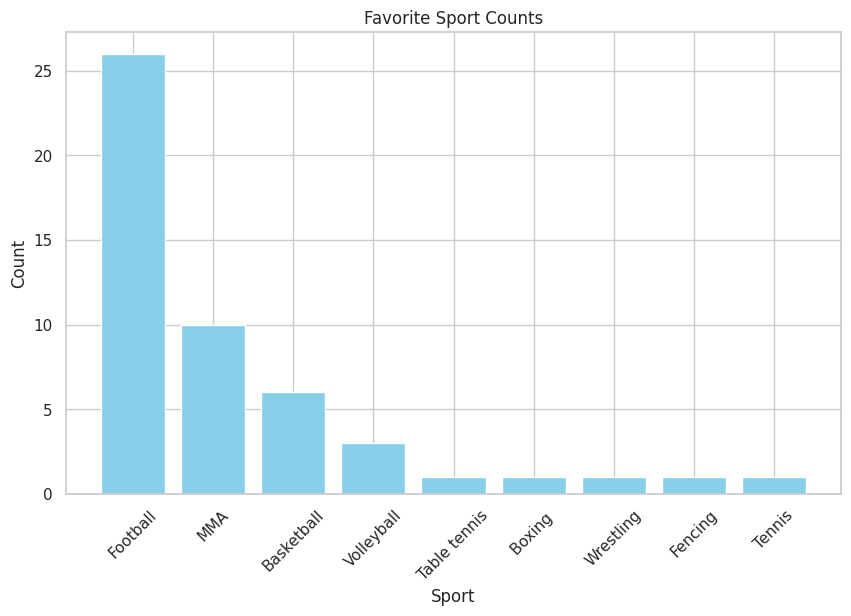

In [ ]:
# Bar plot for 'Favorite Sport'
plt.figure(figsize=(10, 6))
plt.bar(df['Favorite Sport'].value_counts().index, df['Favorite Sport'].value_counts().values, color='skyblue')
plt.title('Favorite Sport Counts')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

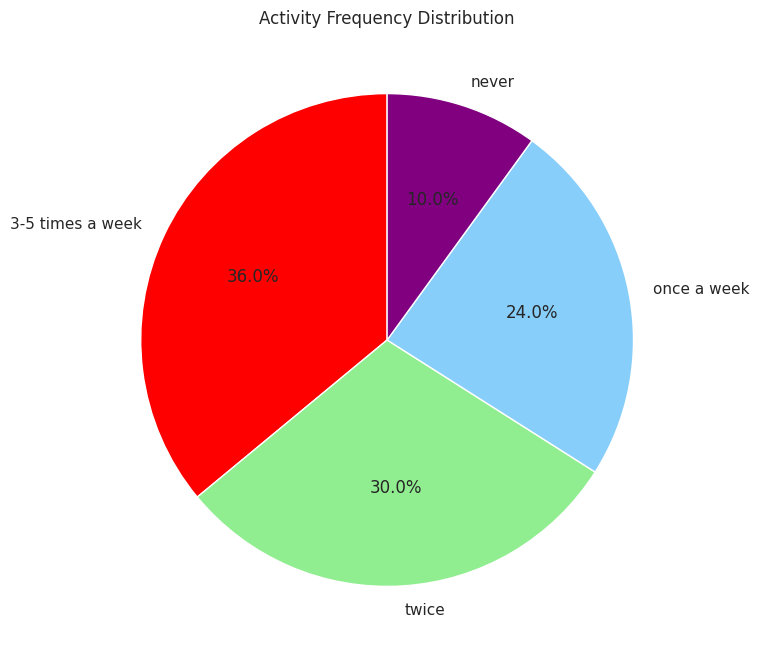

In [ ]:
# Pie chart for 'Activity Frequency'
activity_counts = df['Activity Frequency'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'lightgreen', 'lightskyblue','purple'])
plt.title('Activity Frequency Distribution')
plt.show()

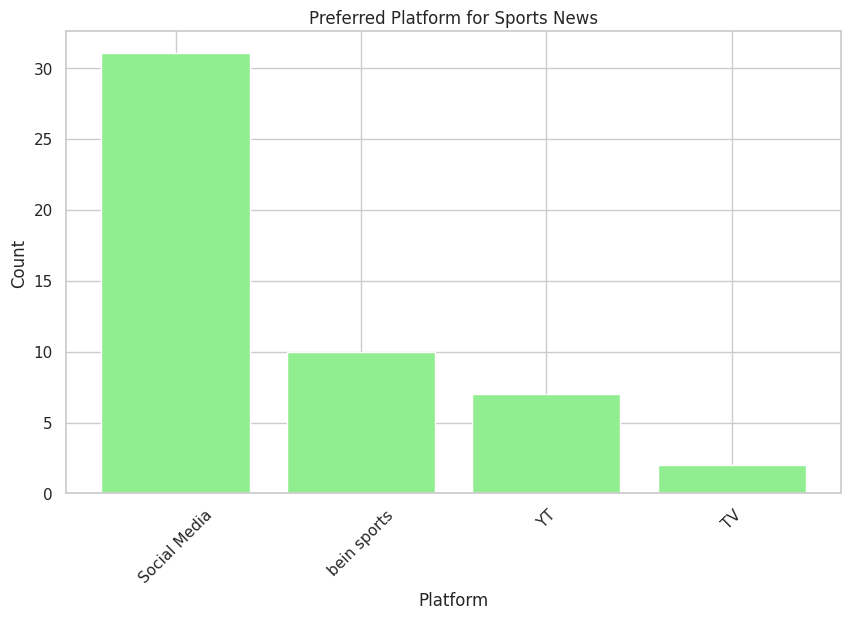

In [ ]:
# Bar plot for 'News Platform'
plt.figure(figsize=(10, 6))
plt.bar(df['News Platform'].value_counts().index, df['News Platform'].value_counts().values, color='lightgreen')
plt.title('Preferred Platform for Sports News')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

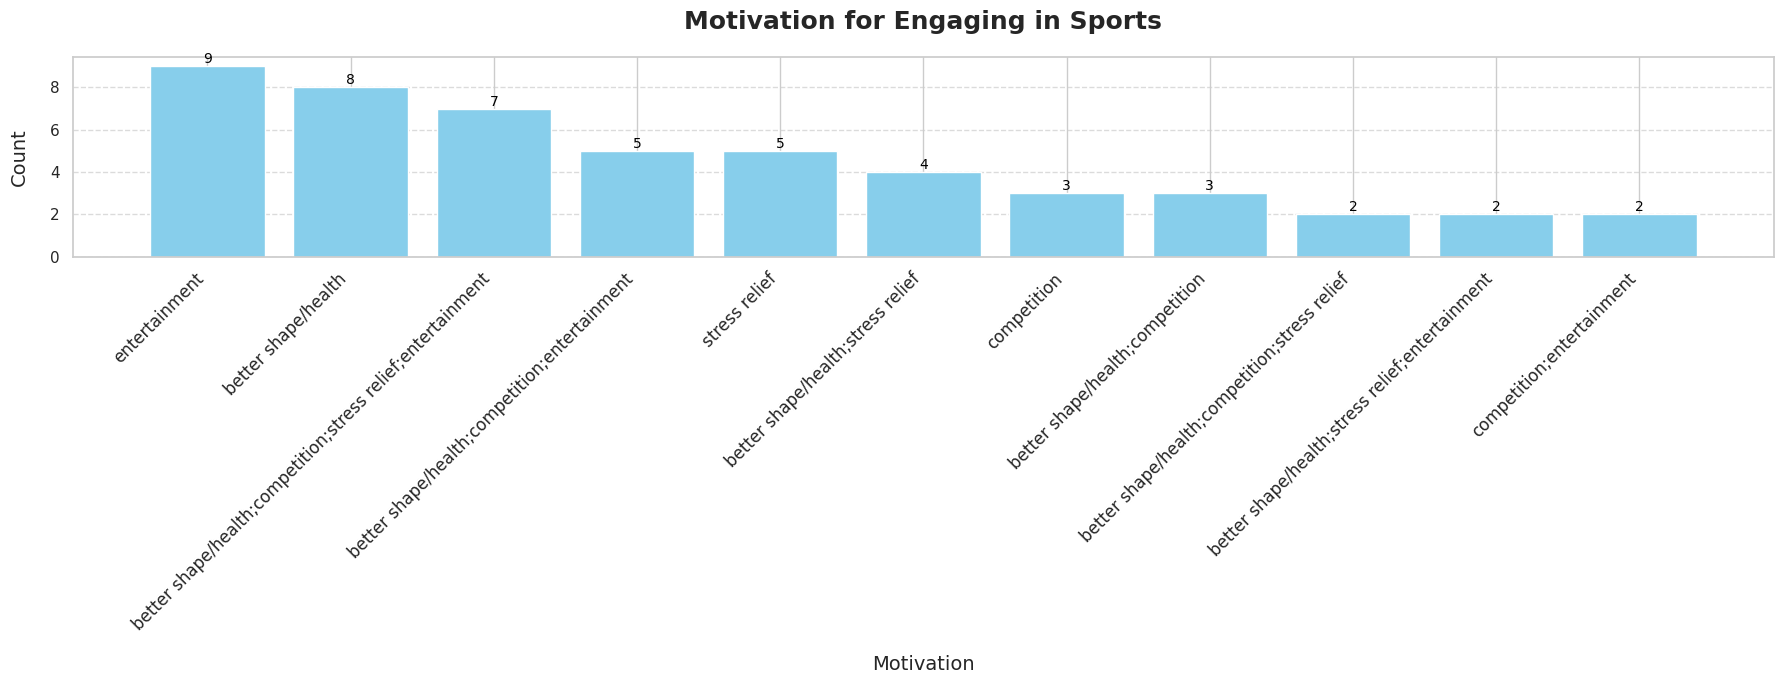

In [ ]:
# Create the bar plot
plt.figure(figsize=(18, 7))

# Plot the bar plot
bars = plt.bar(motivation_frequency.index, motivation_frequency.values, color='skyblue')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')

# Customize title and labels
plt.title('Motivation for Engaging in Sports', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Motivation', fontsize=14, labelpad=15)
plt.ylabel('Count', fontsize=14, labelpad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the graph
plt.show()

In [ ]:

def calculate_categorical_ci(column, confidence_level=0.95):
    counts = column.value_counts()
    total_responses = len(column.dropna())  # Drop missing values
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # Z-score for 95% CI
    results = {}
    for category, count in counts.items():
        proportion = count / total_responses
        margin_of_error = z_score * np.sqrt((proportion * (1 - proportion)) / total_responses)
        ci_lower = proportion - margin_of_error
        ci_upper = proportion + margin_of_error
        results[category] = (proportion, ci_lower, ci_upper)

    return results


# Calculate CI for categorical columns
if 'Favorite Sport' in df.columns:
    favorite_sport_ci = calculate_categorical_ci(df['Favorite Sport'])
    print("\nFavorite Sport Proportions with 95% CI:")
    for sport, (proportion, ci_lower, ci_upper) in favorite_sport_ci.items():
        print(f"{sport}: Proportion = {proportion:.2f}, 95% CI = ({ci_lower:.2f}, {ci_upper:.2f})")

if 'Activity Frequency' in df.columns:
    activity_frequency_ci = calculate_categorical_ci(df['Activity Frequency'])
    print("\nActivity Frequency Proportions with 95% CI:")
    for frequency, (proportion, ci_lower, ci_upper) in activity_frequency_ci.items():
        print(f"{frequency}: Proportion = {proportion:.2f}, 95% CI = ({ci_lower:.2f}, {ci_upper:.2f})")




Favorite Sport Proportions with 95% CI:
Football: Proportion = 0.52, 95% CI = (0.38, 0.66)
MMA: Proportion = 0.20, 95% CI = (0.09, 0.31)
Basketball: Proportion = 0.12, 95% CI = (0.03, 0.21)
Volleyball: Proportion = 0.06, 95% CI = (-0.01, 0.13)
Table tennis: Proportion = 0.02, 95% CI = (-0.02, 0.06)
Boxing : Proportion = 0.02, 95% CI = (-0.02, 0.06)
Wrestling: Proportion = 0.02, 95% CI = (-0.02, 0.06)
Fencing: Proportion = 0.02, 95% CI = (-0.02, 0.06)
Tennis: Proportion = 0.02, 95% CI = (-0.02, 0.06)

Activity Frequency Proportions with 95% CI:
3-5 times a week: Proportion = 0.36, 95% CI = (0.23, 0.49)
twice: Proportion = 0.30, 95% CI = (0.17, 0.43)
once a week: Proportion = 0.24, 95% CI = (0.12, 0.36)
never: Proportion = 0.10, 95% CI = (0.02, 0.18)


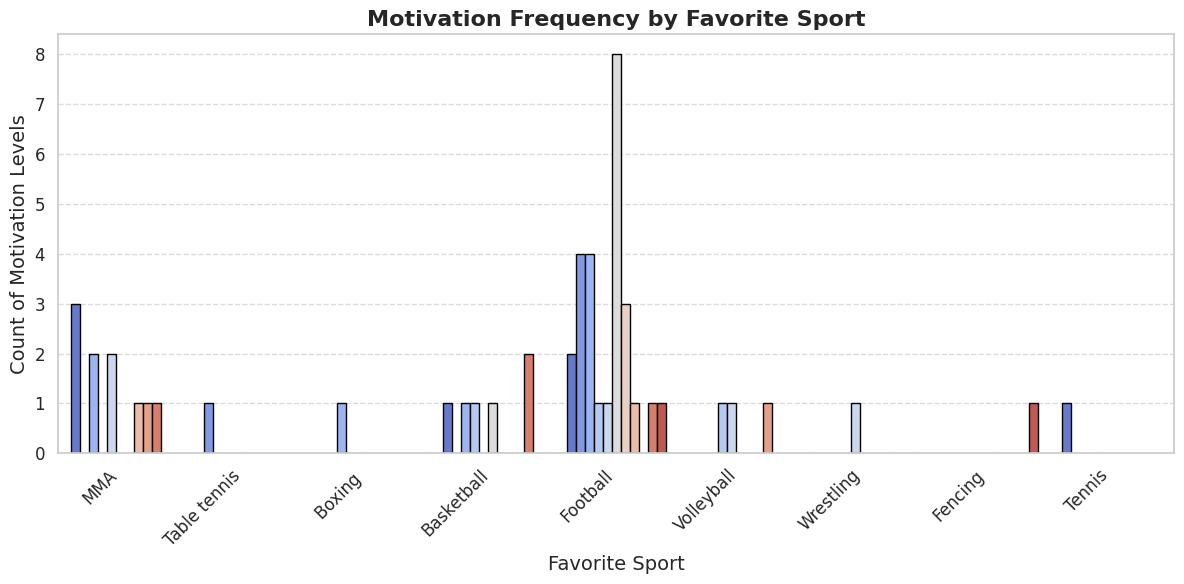

In [ ]:
# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Favorite Sport', hue='Motivation', data=df, palette='coolwarm', edgecolor='black', legend=False)

# Customize the plot
plt.title('Motivation Frequency by Favorite Sport', fontsize=16, fontweight='bold')
plt.xlabel('Favorite Sport', fontsize=14)
plt.ylabel('Count of Motivation Levels', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()